In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [5]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
      "PlantVillage",
      shuffle=True,
      image_size=(IMAGE_SIZE,IMAGE_SIZE),
      batch_size=BATCH_SIZE
  )
dataset

Found 2152 files belonging to 3 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
class_names=dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

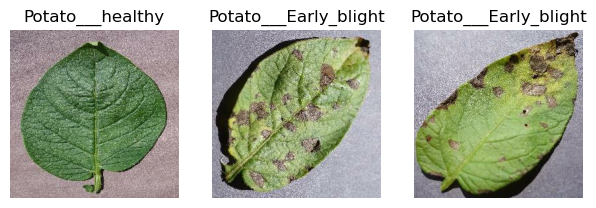

In [11]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(3):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [19]:
def get_dataset_partitions_df(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [20]:
train_ds, val_ds, test_ds =  get_dataset_partitions_df(dataset)

In [21]:
len(train_ds)

54

In [22]:
len(val_ds)



6

In [23]:
len(test_ds)

8

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale=tf.keras.Sequential([
       layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
       layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [27]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
    
])
model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
)

Epoch 1/50
54/54 [==============================] - 73s 1s/step - loss: 0.9137 - accuracy: 0.4884 - val_loss: 0.8535 - val_accuracy: 0.4427
Epoch 2/50
54/54 [==============================] - 60s 1s/step - loss: 0.7774 - accuracy: 0.6279 - val_loss: 0.5880 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 57s 1s/step - loss: 0.5790 - accuracy: 0.7477 - val_loss: 0.4845 - val_accuracy: 0.8073
Epoch 4/50
54/54 [==============================] - 56s 1s/step - loss: 0.3806 - accuracy: 0.8449 - val_loss: 0.5307 - val_accuracy: 0.7917
Epoch 5/50
54/54 [==============================] - 58s 1s/step - loss: 0.2821 - accuracy: 0.8860 - val_loss: 0.2742 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 60s 1s/step - loss: 0.2429 - accuracy: 0.9109 - val_loss: 0.1617 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 59s 1s/step - loss: 0.1614 - accuracy: 0.9375 - val_loss: 0.1738 - val_accuracy: 0.9115
Epoch 8/50
54/54 [==

Epoch 42/50
54/54 [==============================] - 58s 1s/step - loss: 0.0205 - accuracy: 0.9907 - val_loss: 0.0395 - val_accuracy: 0.9844
Epoch 43/50
54/54 [==============================] - 58s 1s/step - loss: 0.0114 - accuracy: 0.9948 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 44/50
54/54 [==============================] - 58s 1s/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0376 - val_accuracy: 0.9948
Epoch 45/50
54/54 [==============================] - 58s 1s/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0406 - val_accuracy: 0.9844
Epoch 46/50
54/54 [==============================] - 58s 1s/step - loss: 0.0112 - accuracy: 0.9948 - val_loss: 0.2496 - val_accuracy: 0.9323
Epoch 47/50
54/54 [==============================] - 58s 1s/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.0886 - val_accuracy: 0.9688
Epoch 48/50
54/54 [==============================] - 58s 1s/step - loss: 0.0314 - accuracy: 0.9850 - val_loss: 0.2791 - val_accuracy: 0.9062
Epoch 49/50
5

In [31]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 227ms/step - loss: 0.0325 - accuracy: 0.9883


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [35]:
def plot_lc(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title("model accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend(["train","val"],loc='upper left')
    plt.show()
    
    
   
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title("model loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["train","val"],loc='upper left')
    plt.show()

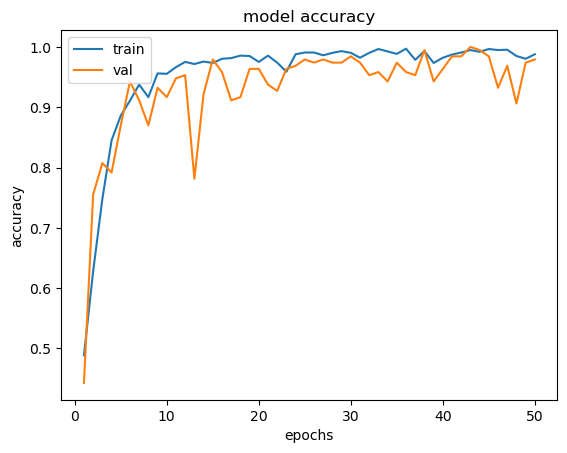

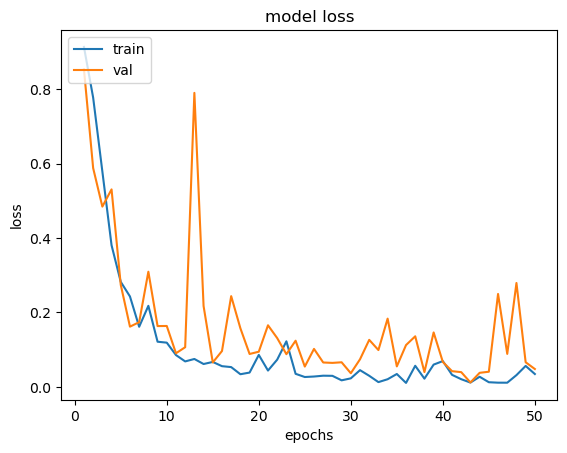

In [36]:
plot_lc(history,EPOCHS)

first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 1s/step
prediction label Potato___Early_blight


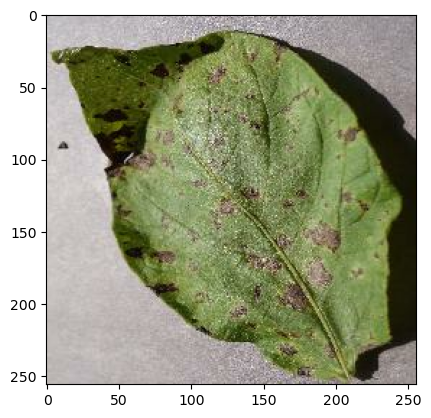

In [29]:
import numpy as np
for images_batch , labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("prediction label",class_names[np.argmax(batch_prediction[0])])

In [30]:
model.save(f"../models/leaf.h5")

In [31]:
#def predict(model):
    #img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #img_array=tf.expand_dims(img_array,0)
    
    #predictions=model.predict(img_array)
    
    #predicted_class=class_names[np.argmax(predictions[0])]
    
    #return predicted_class